In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('Add_sales_data_2018.csv')

In [29]:
data.columns


Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [30]:
#Adding expenditures for different companies
x=data['Add1(in Thousands)']+data['Add2(in Thousands)']+data['Add3(in Thousands)']+data['Add4(in Thousands)']+data['Add5(in Thousands)']

In [31]:
data_new=data.drop(['Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)'],axis=1)

In [34]:
#Creating a new dataframe with a new column Total ad expenditures
data_new['Total Ad Expenditures']=x

In [35]:
data_new.head()

,Date,Profit(in Thousands),Total Ad Expenditures
0,2018-10-08,4093.065,1068.25
1,2018-10-05,4042.448,1060.95
2,2018-10-04,4213.819,1102.90
3,2018-10-03,4391.665,1147.30
4,2018-10-01,4350.683,1151.40


# 1)

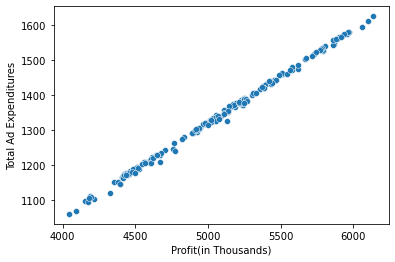

In [36]:
sns.scatterplot(x=data_new['Profit(in Thousands)'],y=data_new['Total Ad Expenditures'])
plt.show()

From this scatterplot we can conclude that expenditure on ads and profits generated has strong positive correlation

In [37]:
pfadcorr=data_new.drop('Date',axis=1).corr()
pfadcorr

,Profit(in Thousands),Total Ad Expenditures
Profit(in Thousands),1.000000,0.999054
Total Ad Expenditures,0.999054,1.000000


This is also shows strong positive correlation of 0.999054

# 2)

In [38]:
#Importing train_test_split model from scikitlearn library
from sklearn.model_selection import train_test_split

In [40]:
#Select the target and independent variable
x=data.drop(['Date','Profit(in Thousands)'],axis=1)
y=data['Profit(in Thousands)']

In [41]:
#Importing linearmodel from sklearn library 
from sklearn import linear_model

In [42]:
#Creating an instance of the linear model
lr=linear_model.LinearRegression()

In [45]:
#Splitting the dataset and to train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.25)

In [46]:
#Fitting the model
model=lr.fit(x_train,y_train)

In [48]:
#Storing the predicted variables into a variable
pred=model.predict(x_test)

In [49]:
pred

array([4152.066, 4446.441, 5131.898, 4907.56 , 5004.282, 4623.793,
       5384.175, 5328.025, 5175.051, 5956.323, 5780.799, 4997.719,
       5075.858, 5784.54 , 4936.12 , 5065.652, 4190.965, 5034.726,
       5015.536, 5134.657, 5145.131, 5421.94 , 4569.293, 4598.292,
       4436.321, 4175.677, 5616.791, 5667.25 , 4648.834, 5717.838,
       5001.615, 5182.368, 5017.503, 5545.013, 5013.207, 5030.451,
       5108.626, 4760.877, 4606.34 , 4925.861, 5250.788, 5038.222,
       5491.792, 5019.997, 4647.356, 4486.38 , 4435.174, 5300.437,
       5425.19 , 4482.183, 4193.095, 6062.457])

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
#Calculating the MSE Value
mean_squared_error(pred,y_test)

6.999220567756388e-25

# 3)

In [58]:
#Using the dataset given in question to predict the profit
futurexp=pd.DataFrame({'Add1':290,'Add2':312,'Add3':309,'Add4':298,'Add5':320},index=[0])


In [59]:
Prediction=model.predict(futurexp)

In [60]:
print('Predicted profit using given ad expenditure value is:',Prediction)

Predicted profit using given ad expenditure value is: [5820.06]


So using the model that I have created, a profit(in thousands) of 5820.06 is predicted